<a href="https://colab.research.google.com/github/Dhyeonle9/2312-data-visualization/blob/main/231214_as_07_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# https://www.kaggle.com/datasets/ayessa/salary-prediction-classification
# https://www.kaggle.com/datasets/ayessa/salary-prediction-classification/code?datasetId=2096417&sortBy=voteCount
df = pd.read_csv(
    "https://raw.githubusercontent.com/BigDeepData/2312_as/main/data/salary.csv",
    skipinitialspace=True
    )
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# 결측치, 열별 타입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
# 연속형 변수
# age : 연령
# education-num : 교육수준등급
# capital-gain : 자산 증가량
# capital-loss : 자산 감소량
# hours-per-week : 주당 노동 시간
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [ ]:
# 범주형 변수
# workclass : 고용 형태
# education : 학력
# marital-status : 결혼 상태
# occupation : 직업
# relationship : 가족관계
# race : 인종
# sex : 성별
# native-country : 출신국가
# class : 연봉 범위
df.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


# 전처리

## 종속변수 처리

In [ ]:
# salary / 종속변수 / 타깃 / 라벨
df['salary']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: salary, Length: 32561, dtype: object

In [ ]:
# 숫자 형태로 바꿔줘야 사용 가능

# 분류 -> 50k 초과 (1) / 50k 이하 (0)
# df['class'] = df['class'].map({' <=50K': 0, ' >50K':1})
df['salary'] = df['salary'].map({'<=50K': 0, '>50K':1})
# pd.get_dummies()
df['salary']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [ ]:
df['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

<Axes: >

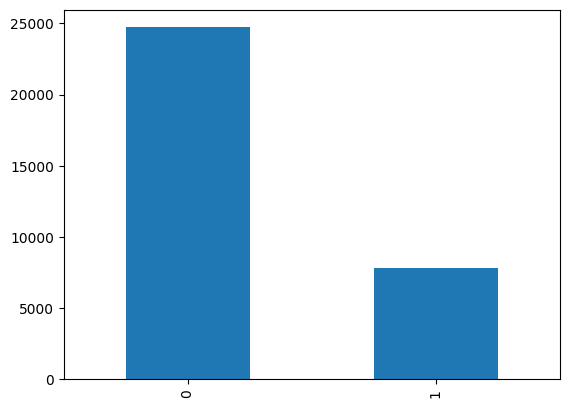

In [ ]:
df['salary'].value_counts().plot(kind='bar')

In [ ]:
df['salary'].value_counts() / len(df['salary'])

0   0.76
1   0.24
Name: salary, dtype: float64

범주형 변수의 변환
1. 순서형 : 크고 작음이 있음, 비교 연산은 되는데, 산술 연산이 안되서 통계값 X
1. 명목형 : 소속 여부, 특성 해당하는지... 비교 연산 X
---
1. 순서형은 순서대로 숫자로 만들어버리면 처리 가능
1. 범주형 변수에 대응하는 대표적인 숫자를 집어넣어줌 (평균 소득, 재산 수준)
    - 통계값에 따른 잘못된 모델링
1. 명목형 -> 원핫인코딩(0,1) => 더미변수
    - 열이 늘어나서 성능에 영향

In [ ]:
df.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


In [ ]:
obj_list = df.describe(include='O').columns # 범주형 변수 값
obj_list

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

## 고유값이 10개 이상일 경우 선택
* 더미변수화 시키기 어렵기 때문에 변형, 삭제, 선택

In [ ]:
# 범주형 변수 처리
# 1. 연속형 변수로 변환
# 2. drop (삭제)
# 3. dummies
# 고윳값이 10개 초과인 경우 -> dummies로 바꾸기에는 문제가 있음음
for o in obj_list:
    if df[o].nunique() > 10:
        print(o, df[o].nunique())

education 16
occupation 15
native-country 42


### education

In [ ]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
df['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [ ]:
# education / education-num 1대1 대응이 되는지 확인
# for n in range(df.education.nunique()): # 0~education 고유값 (끝 제외)
    # print(f'**{n+1}**')
    # print(df[df['education-num'] == n+1]['education'])
for n in range(1, df.education.nunique() + 1): # 1~education 고유값 + 1 (끝 제외)
    print(f'**{n}**')
    # print(df[df['education-num'] == n]['education'])
    print(df[df['education-num'] == n]['education'].unique())

**1**
['Preschool']
**2**
['1st-4th']
**3**
['5th-6th']
**4**
['7th-8th']
**5**
['9th']
**6**
['10th']
**7**
['11th']
**8**
['12th']
**9**
['HS-grad']
**10**
['Some-college']
**11**
['Assoc-voc']
**12**
['Assoc-acdm']
**13**
['Bachelors']
**14**
['Masters']
**15**
['Prof-school']
**16**
['Doctorate']


In [ ]:
df.drop('education', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.5+ MB


### occupation

In [ ]:
# df.occupation
df.occupation.value_counts() # 직업군 -> 우열 없음

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
df.groupby('occupation')['salary'].mean().sort_values(ascending=False)

occupation
Exec-managerial     0.48
Prof-specialty      0.45
Protective-serv     0.33
Tech-support        0.30
Sales               0.27
Craft-repair        0.23
Transport-moving    0.20
Adm-clerical        0.13
Machine-op-inspct   0.12
Farming-fishing     0.12
Armed-Forces        0.11
?                   0.10
Handlers-cleaners   0.06
Other-service       0.04
Priv-house-serv     0.01
Name: salary, dtype: float64

### native-country

In [ ]:
df['native-country'].value_counts()
# 1. 미국 - 비미국 => 1, 0 (eq, ==)
# 2. 대륙별/언어권별/인종별 -> 추가적인 기준을 만들어서 그룹화한다음 더미변수화
# 3. 순서화 시켜버림 => 출신국가별로 고연봉자 비율을 구해서 -> 해당 비율별로 수치형 변수

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [ ]:
# groupby(묶고 싶은 열 이름)[확인하고 싶은 열 이름].적용하고 싶은 그룹함수()
# 고연봉자인 사람은 1, 아닌 사람은 0 => (고연봉자들 1) / 전체 데이터 수 => 전체 사람 대비 고연봉자의 비율
# class 0,1 => (1:고연봉자)의 비율
df.groupby('native-country')['salary'].mean() # class 0,1 => (1:고연봉자)의 비율
# df.groupby['class'].mean()

native-country
?                            0.25
Cambodia                     0.37
Canada                       0.32
China                        0.27
Columbia                     0.03
Cuba                         0.26
Dominican-Republic           0.03
Ecuador                      0.14
El-Salvador                  0.08
England                      0.33
France                       0.41
Germany                      0.32
Greece                       0.28
Guatemala                    0.05
Haiti                        0.09
Holand-Netherlands           0.00
Honduras                     0.08
Hong                         0.30
Hungary                      0.23
India                        0.40
Iran                         0.42
Ireland                      0.21
Italy                        0.34
Jamaica                      0.12
Japan                        0.39
Laos                         0.11
Mexico                       0.05
Nicaragua                    0.06
Outlying-US(Guam-USVI-etc)   0.00

In [ ]:
# 오름차순 (작은->큰데이터)
# df.groupby('native-country')['salary'].mean().sort_values()
# 내림차순 (큰->작은데이터)
df.groupby('native-country')['salary'].mean().sort_values(ascending=False)

native-country
Iran                         0.42
France                       0.41
India                        0.40
Taiwan                       0.39
Japan                        0.39
Yugoslavia                   0.38
Cambodia                     0.37
Italy                        0.34
England                      0.33
Canada                       0.32
Germany                      0.32
Philippines                  0.31
Hong                         0.30
Greece                       0.28
China                        0.27
Cuba                         0.26
?                            0.25
Scotland                     0.25
United-States                0.25
Hungary                      0.23
Ireland                      0.21
South                        0.20
Poland                       0.20
Thailand                     0.17
Ecuador                      0.14
Jamaica                      0.12
Laos                         0.11
Portugal                     0.11
Trinadad&Tobago              0.11

In [ ]:
country_group = df.groupby('native-country').mean()['salary'] # 출신국가별 고연봉자 비율
# country_group 나라별 고연봉자 비율을 원래 df에 합치고 싶어요
# pd.merge(...) df1.merge(df2)
country_group

<ipython-input-34-ce5c57576d47>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_group = df.groupby('native-country').mean()['salary'] # 출신국가별 고연봉자 비율


native-country
?                            0.25
Cambodia                     0.37
Canada                       0.32
China                        0.27
Columbia                     0.03
Cuba                         0.26
Dominican-Republic           0.03
Ecuador                      0.14
El-Salvador                  0.08
England                      0.33
France                       0.41
Germany                      0.32
Greece                       0.28
Guatemala                    0.05
Haiti                        0.09
Holand-Netherlands           0.00
Honduras                     0.08
Hong                         0.30
Hungary                      0.23
India                        0.40
Iran                         0.42
Ireland                      0.21
Italy                        0.34
Jamaica                      0.12
Japan                        0.39
Laos                         0.11
Mexico                       0.05
Nicaragua                    0.06
Outlying-US(Guam-USVI-etc)   0.00

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [ ]:
country_group

native-country
?                            0.25
Cambodia                     0.37
Canada                       0.32
China                        0.27
Columbia                     0.03
Cuba                         0.26
Dominican-Republic           0.03
Ecuador                      0.14
El-Salvador                  0.08
England                      0.33
France                       0.41
Germany                      0.32
Greece                       0.28
Guatemala                    0.05
Haiti                        0.09
Holand-Netherlands           0.00
Honduras                     0.08
Hong                         0.30
Hungary                      0.23
India                        0.40
Iran                         0.42
Ireland                      0.21
Italy                        0.34
Jamaica                      0.12
Japan                        0.39
Laos                         0.11
Mexico                       0.05
Nicaragua                    0.06
Outlying-US(Guam-USVI-etc)   0.00

In [ ]:
df2 = df.copy()

In [ ]:
country_group.reset_index()

,native-country,salary
0,?,0.25
1,Cambodia,0.37
2,Canada,0.32
3,China,0.27
4,Columbia,0.03
5,Cuba,0.26
6,Dominican-Republic,0.03
7,Ecuador,0.14
8,El-Salvador,0.08
9,England,0.33


In [ ]:
# reset index 후에 해당 열을 on 기준으로 사용하는 경우
df2.merge(country_group.reset_index(), on='native-country', how='left')

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_x,salary_y
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0.25
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0.25
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0.25
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0.25
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.25
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.25
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.25
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.25


In [ ]:
# A.merge(B, on=[기준이되는열]) A 왼쪽, B 오른쪽
# A.merge(B, left_on=[기준이되는열], right_index=True) B는 인덱스를 사용해서 합쳐주겠다
# class => class_x, class_y : x 원본 df의 것, y는 출신국가별로 산출한 고연봉자 비율
df = df.merge(country_group, left_on='native-country', right_index=True, how='left')
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_x,salary_y
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0.25
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0.25
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0.25
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0.25
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.25
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.25
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.25
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.25


In [ ]:
# column 이름 바꾸기
df.rename(columns = {'salary_x': 'salary', 'salary_y': 'country_salary'})
# df = df.rename(columns = {'class_x': 'class', 'class_y': 'country_class'})
df.rename(columns = {'salary_x': 'salary', 'salary_y': 'country_salary'}, inplace=True) # 원본을 수정

In [ ]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,country_salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0.25
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0.25
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0.25
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0.25
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0.26


범주형 변수들 전처리
* 결정 트리 -> 아웃라이어 X, 거리 기반 X => 범주형 변수만 잘 처리해주면 전처리에 손이 별로 안감 (결측치는 해줘야하고)
* 고윳값이 별로 없으면 그냥 더미 변수화
* 10개 넘어가는 -> `education`, `occupation`, `native-country`
* education -> education-num => 교육수준에 따른 순서형 변수
* occupation -> 이미 묶여있고, 소득 수준에도 큰 영향을 끼칠 것으로 예상 (직업? 직군?) => 더미변수화
* native-country -> 나라별 고연봉자 비율 -> 연속형 변수 (트리 방식 -> 구분하는데 문제 없으면 됨)

## 결측치 처리

In [ ]:
df = df.replace(-99, np.NaN)

<Axes: >

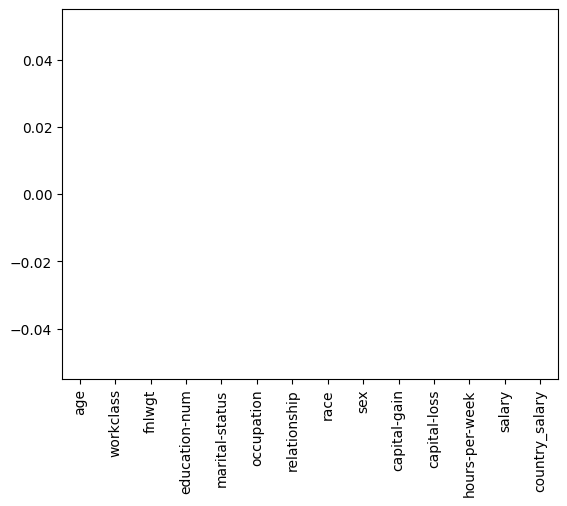

In [ ]:
# df.isna().mean()
df.isna().mean().plot(kind='bar')

### native-country

In [ ]:
# native-country -> 불법이민, 무국적자?
# native-country -> country_class
# 0~1 사이의 비율값 <=> 구분점을 두기 위해서 빈값(NaN)은 -99
df.drop('native-country', axis=1, inplace=True)
# 0~1 사이의 비율값 <=> 구분점을 두기 위해서 빈값(NaN)은 -99
df['country_salary'].fillna(-99, inplace=True)
df.isna().mean()

age              0.00
workclass        0.06
fnlwgt           0.00
education-num    0.00
marital-status   0.00
occupation       0.06
relationship     0.00
race             0.00
sex              0.00
capital-gain     0.00
capital-loss     0.00
hours-per-week   0.00
salary           0.00
country_salary   0.00
dtype: float64

### workclass

In [ ]:
df.workclass.value_counts() / len(df)

Private            0.70
Self-emp-not-inc   0.08
Local-gov          0.06
State-gov          0.04
Self-emp-inc       0.03
Federal-gov        0.03
Without-pay        0.00
Never-worked       0.00
Name: workclass, dtype: float64

<Axes: >

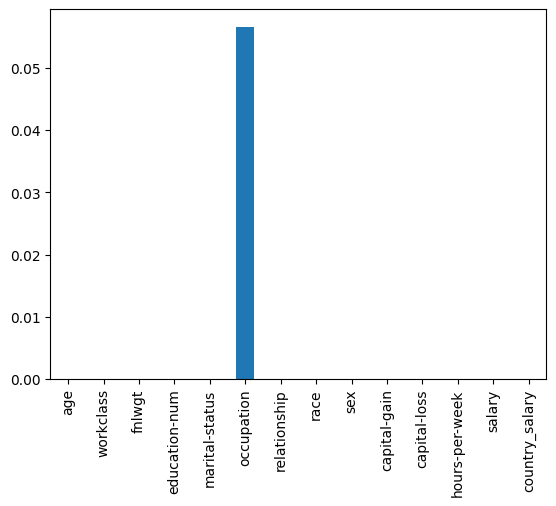

In [ ]:
# 최빈값으로 채워줌
df['workclass'].fillna('Private', inplace=True)
df.isna().mean().plot(kind='bar')

### occupation

In [ ]:
df['occupation'].value_counts() / len(df)

Prof-specialty      0.13
Craft-repair        0.13
Exec-managerial     0.12
Adm-clerical        0.12
Sales               0.11
Other-service       0.10
Machine-op-inspct   0.06
Transport-moving    0.05
Handlers-cleaners   0.04
Farming-fishing     0.03
Tech-support        0.03
Protective-serv     0.02
Priv-house-serv     0.00
Armed-Forces        0.00
Name: occupation, dtype: float64

<Axes: >

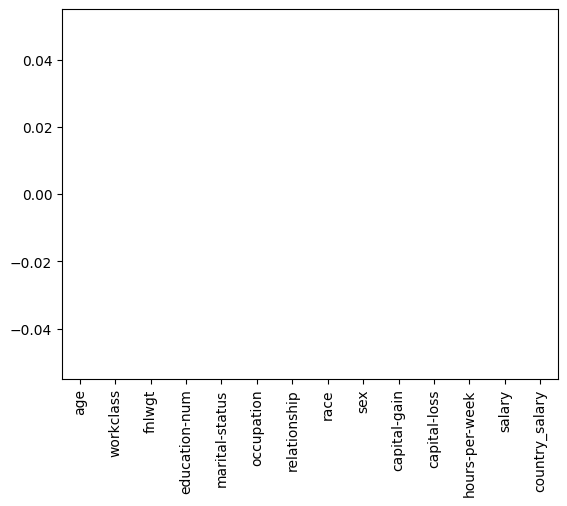

In [ ]:
df['occupation'].fillna('Unknown', inplace=True)
df.isna().mean().plot(kind='bar')

In [ ]:
df.drop('fnlwgt', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   education-num   32561 non-null  int64  
 3   marital-status  32561 non-null  object 
 4   occupation      32561 non-null  object 
 5   relationship    32561 non-null  object 
 6   race            32561 non-null  object 
 7   sex             32561 non-null  object 
 8   capital-gain    32561 non-null  int64  
 9   capital-loss    32561 non-null  int64  
 10  hours-per-week  32561 non-null  int64  
 11  salary          32561 non-null  int64  
 12  country_salary  32561 non-null  float64
dtypes: float64(1), int64(6), object(6)
memory usage: 3.2+ MB


In [ ]:
df.describe(include='O').columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex'],
      dtype='object')

In [ ]:
df_dummy=pd.get_dummies(
    df, columns=df.describe(include='O').columns, drop_first=True
)
df_dummy.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary,country_salary,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,13,2174,0,40,0,0.25,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,13,0,0,13,0,0.25,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38,9,0,0,40,0,0.25,0,0,1,...,1,0,0,0,0,0,0,0,1,1
3,53,7,0,0,40,0,0.25,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,28,13,0,0,40,0,0.26,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   32561 non-null  int64  
 1   education-num                         32561 non-null  int64  
 2   capital-gain                          32561 non-null  int64  
 3   capital-loss                          32561 non-null  int64  
 4   hours-per-week                        32561 non-null  int64  
 5   salary                                32561 non-null  int64  
 6   country_salary                        32561 non-null  float64
 7   workclass_Local-gov                   32561 non-null  uint8  
 8   workclass_Never-worked                32561 non-null  uint8  
 9   workclass_Private                     32561 non-null  uint8  
 10  workclass_Self-emp-inc                32561 non-null  uint8  
 11  workclass_Self-

## 훈련셋/시험셋 분리

In [ ]:
X = df_dummy.drop('salary', axis=1) # 목표변수 (관측값, 피쳐)
y = df_dummy['salary'] # 종속변수 (종속값, 라벨)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=14,
)

# 모델링 & 평가

In [ ]:
# 회귀 - 연속형변수 예측 - DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier # 분류 - 범주형 변수 예측

In [ ]:
model = DecisionTreeClassifier(
    random_state=14
)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=14)

In [ ]:
pred = model.predict(X_test)
pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
model.predict_proba(X_test)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, pred)

0.8190403071017275

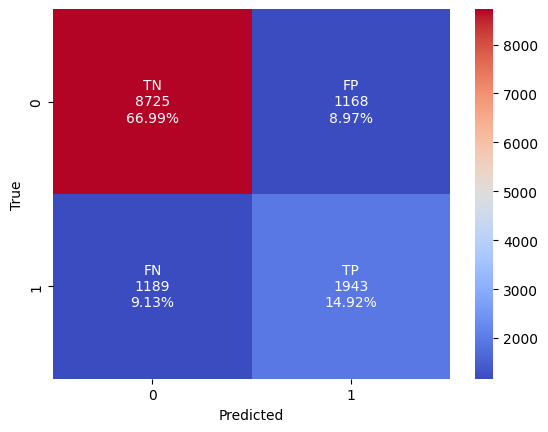

In [ ]:
cf_matrix = confusion_matrix(y_test,pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

# 트리 그래프 시각화

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
df_dummy.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'salary', 'country_salary', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'occupation_Unknown',
       'relationship_Not-

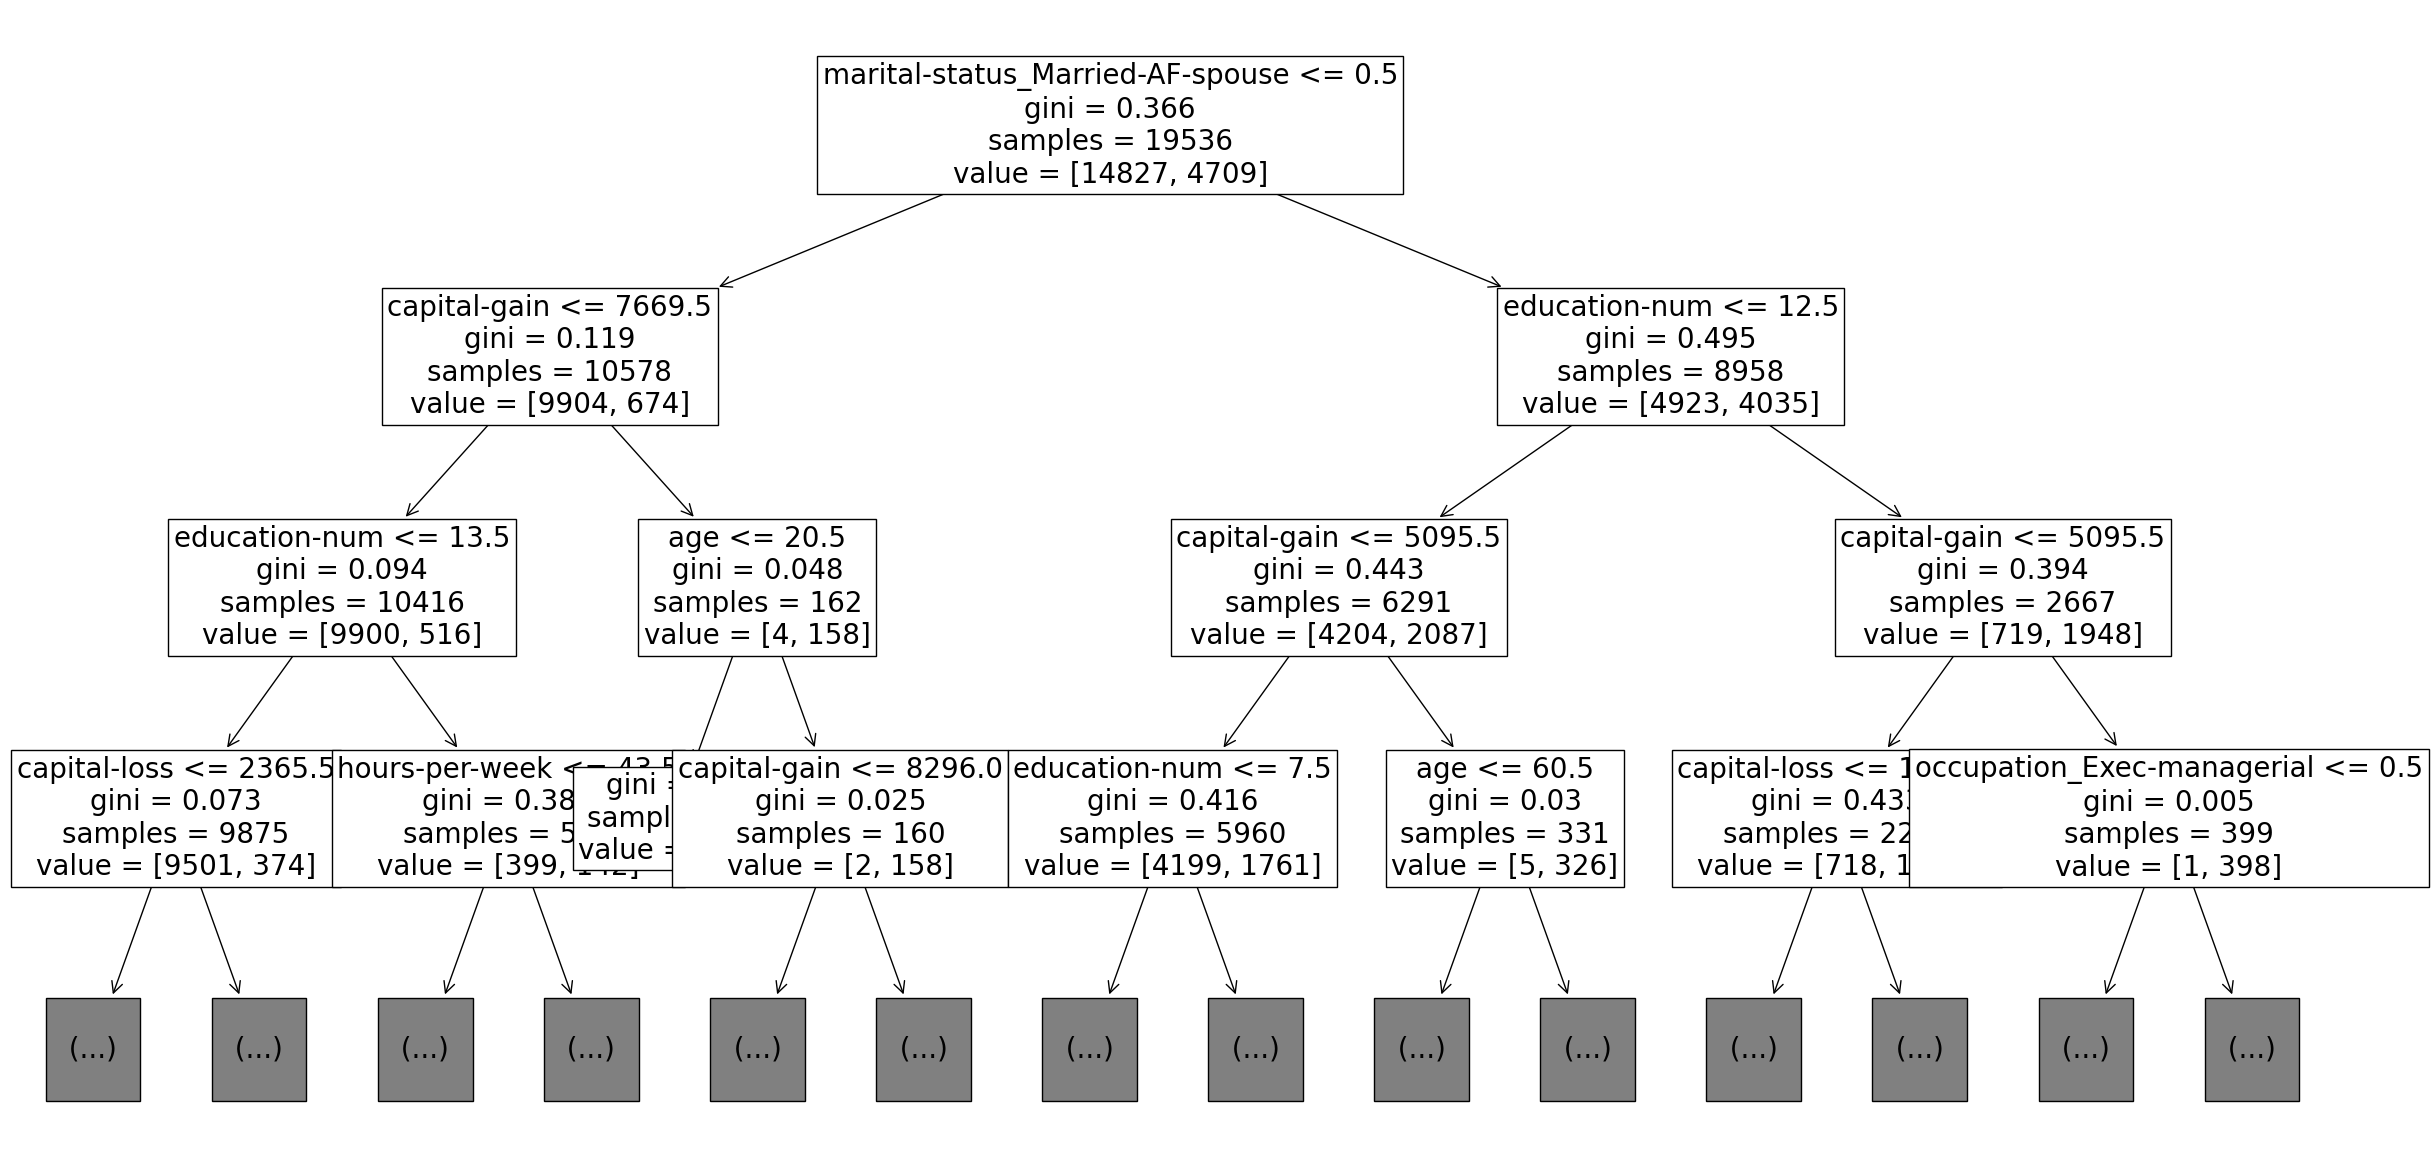

In [ ]:
plt.figure(figsize=(30, 15)) # plt 객체의 크기 결정
# 트리 구조를 보고 싶은 모델을 넣고, 최대 깊이, 폰트 사이즈,
# plot_tree(model, max_depth=3, fontsize=20) # 변수명 지정 X
plot_tree(model, max_depth=3, fontsize=20, feature_names=df_dummy.columns) # 독립변수명을 추가로 지정
plt.show()

# 하이퍼 패러미터 튜닝

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=100)
model.fit(X_train, y_train) # 훈련 데이터 -> 모델 학습
# 훈련 데이터로 모델을 통해서 예측
train_pred = model.predict(X_train) # 학습을 시킨 값으로 다시 예측
# 시험 데이터로 모델을 통해서 예측
test_pred = model.predict(X_test) # 새로운 값으로 신규 예측
print(f"Train Score : {accuracy_score(y_train, train_pred)}") # 기출문제 풀기
print(f"Test Score : {accuracy_score(y_test, test_pred)}") # 새로운 문제 풀기
# 훈련된 데이터는 잘 예측하는데 시험 데이터는 잘 예측 못한다?
# 학습이 너무 잘 되어있다 = 새로운 데이터에 대한 적응력이 떨어진다
# 과최적화 되어있다 = over-fitting

Train Score : 0.9820331695331695
Test Score : 0.8181190019193858


In [ ]:
# max_depth : 트리의 깊이 제한

model.fit(X_train, y_train) # 훈련 데이터 -> 모델 학습
# 훈련 데이터로 모델을 통해서 예측
train_pred = model.predict(X_train) # 학습을 시킨 값으로 다시 예측
# 시험 데이터로 모델을 통해서 예측
test_pred = model.predict(X_test) # 새로운 값으로 신규 예측
print(f"Train Score : {accuracy_score(y_train, train_pred)}") # 기출문제 풀기
print(f"Test Score : {accuracy_score(y_test, test_pred)}") # 새로운 문제 풀기

Train Score : 0.9820331695331695
Test Score : 0.8181190019193858


> 트리가 깊어지면 오버피팅 문제가 난다

* 기본값(결정 트리)의 설정은 구분되는 것까지 가장 깊은 노드값까지 탐색해서 내려갑니다
* 오버피팅(과최적화) : 학습이 너무 잘되서 새로운 데이터에 대한 예측력이 오히려 떨어지는 상황

In [ ]:
# max_depth : 트리의 깊이 제한

model.fit(X_train, y_train) # 훈련 데이터 -> 모델 학습
# 훈련 데이터로 모델을 통해서 예측
train_pred = model.predict(X_train) # 학습을 시킨 값으로 다시 예측
# 시험 데이터로 모델을 통해서 예측
test_pred = model.predict(X_test) # 새로운 값으로 신규 예측
print(f"Train Score : {accuracy_score(y_train, train_pred)}") # 기출문제 풀기
print(f"Test Score : {accuracy_score(y_test, test_pred)}") # 새로운 문제 풀기

Train Score : 0.8605357447534551
Test Score : 0.8555049393458566


In [ ]:
def test_depth(depth):
    # max_depth : 트리의 깊이 제한
    model = DecisionTreeClassifier(random_state=100, max_depth=depth)
    model.fit(X_train, y_train) # 훈련 데이터 -> 모델 학습
    # 훈련 데이터로 모델을 통해서 예측
    train_pred = model.predict(X_train) # 학습을 시킨 값으로 다시 예측
    # 시험 데이터로 모델을 통해서 예측
    test_pred = model.predict(X_test) # 새로운 값으로 신규 예측
    print(f"depth : {depth}")
    print(f"Train Score : {accuracy_score(y_train, train_pred)}") # 기출문제 풀기
    print(f"Test Score : {accuracy_score(y_test, test_pred)}") # 새로운 문제 풀기

In [ ]:
for i in range(1, 20):
    test_depth(i)

depth : 1
Train Score : 0.7604163112096912
Test Score : 0.7611711112248554
depth : 2
Train Score : 0.8291759085480294
Test Score : 0.8288375902134412
depth : 3
Train Score : 0.8447022692373315
Test Score : 0.8434252955929774
depth : 4
Train Score : 0.8451117556730934
Test Score : 0.8433229257306649
depth : 5
Train Score : 0.8510493089916397
Test Score : 0.8481343092593541
depth : 6
Train Score : 0.8560996416993687
Test Score : 0.8542253160669498
depth : 7
Train Score : 0.8605357447534551
Test Score : 0.8555049393458566
depth : 8
Train Score : 0.8648353523289541
Test Score : 0.8570404872805446
depth : 9
Train Score : 0.8676335096399932
Test Score : 0.8578594461790449
depth : 10
Train Score : 0.8707387817778536
Test Score : 0.8584224804217638
depth : 11
Train Score : 0.8736734345674799
Test Score : 0.8551466448277627
depth : 12
Train Score : 0.8779047944036854
Test Score : 0.8529456927880432
depth : 13
Train Score : 0.8819655348916567
Test Score : 0.8508471106106362
depth : 14
Train Scor